# ব্যাবহারিক - পাই স্পার্ক এক্সপ্লোরেটরি ডেটা এনালাইসিস, ডেটা ক্লিনিং, ভ্যালিডেশন, ট্রান্সফর্মেশন, বিগ ডেটা কোয়েরি, জয়েনিং, ভিজুয়ালাইজেশন

#### GBIF—গ্লোবাল বায়োডাইভারসিটি ইনফরমেশন ফ্যাসিলিটি—একটি আন্তর্জাতিক নেটওয়ার্ক এবং ডেটার অবকাঠামো যা বিশ্বের বিভিন্ন দেশের সরকারি অর্থায়নে পরিচালিত। GBIF এর লক্ষ্য হচ্ছে সকলকে, পৃথিবীর সমস্ত ধরণের জীব বৈচিত্র্য সম্পর্কিত ডেটাতে উন্মুক্ত অ্যাক্সেস প্রদান করা। এই ডেটা সোর্স প্রতিনিয়ত আপডেট করার মাধ্যমে লাইভ রাখা হয়। GBID ডেটা বিগ ডেটা এনালাইসিস এর প্রয়োগ এর একটি আদর্শ ডেটাসেট।

https://www.gbif.org/country/BD/summary

#### আমরা এখানে GBIF এর বাংলাদেশ সম্পর্কিত ডেটা ব্যবহার করে পাই স্পার্ক এর একটি ব্যবহারিক দেখাবো। মূলত এই ডেটাতে বাংলাদেশের বিভিন্ন এলাকায় বিভিন্ন সময়ে বিভিন্ন প্রজাতির জীববৈচিত্র্য দর্শন এর ঘটনা রেকর্ড করা হয়।

#### এই ব্যবহারিক এর মাধ্যমে আমরা যেসকল বিষয় সম্পর্কে জানবোঃ 

#### - পাই স্পার্ক ব্যবহার করে এক্সপ্লোরেটরি ডেটা এনালাইসিস
#### - ডেটা এর স্কিমা চেক করে ডেটা ভ্যালিডেট করা
#### - বেসিক ডেটা ক্লিনিং
#### - বিগ ডেটা কোয়েরি এবং এনালাইসিস
#### - PySpark Transformation and Action ব্যবহার করে বিগ ডেটা ট্রান্সফর্মেশনের কিছু বেসিক অপারেশন
#### - বিগ ডেটা ডিস্ট্রিবিউশন চেক, বেসিক ভিজুয়ালাইজেশন

#### পাই স্পার্ক না থাকলে প্রথমে ইন্সটল করে নিতে হবে

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=9a381a0a2458f9205efcbef4b6b0b86ac70b0054410000a6967342085b2dcbe9
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


### শুরুতে স্পার্ক এর একটি সেশন স্টার্ট করতে হবে। এই সেশন এর নাম দেয়া হচ্ছেঃ gbifbdEDA

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("gbifbdEDA").getOrCreate()

### স্পার্ক ডেটাফ্রেম ট্রান্সফর্মেশন এর জন্য প্রয়োজনীয় মডিউল লোড করে নিতে হবে

In [2]:
from pyspark.sql import functions as F

### স্পার্ক সেশন এর বৃত্তান্ত দেখার জন্য spark লিখে রান দিতে হবে। Spark UI এর লিঙ্ক এ ক্লিক করলে আমরা ব্রাউজারে স্পার্ক ইউআই হতে স্পার্ক এর বিভিন্ন চলমান প্রসেস দেখতে পাব

In [3]:
spark

#### আমরা আমাদের বিগ ডেটা স্পার্ক সেশনে লোড করে নিবো। ডেটাটি পারকেট (Parquet) ফরম্যাট এ রয়েছে। বিগ ডেটা এনালাইসিস এর জন্য পারকেট ফরম্যাট এর ডেটা ব্যবহারের অনেক সুবিধা রয়েছে। পারকেট ফাইল অনেক বেশি মেমোরি এফিসিয়েন্ট। অর্থাৎ কম র‍্যাম ব্যবহার করে। এছাড়া স্পিড এর দিক থেকে বেশ ভালো। এই পারকেট ফরম্যাট হচ্ছে এপাচি অ্যারো (Apache Arrow) এর একটি ফাইল ফরম্যাট যা বিগ ডেটা এনালাইসিস এর জন্য বিশেষ সুবিধা প্রদান করে। ব্যবহারিক এর এই ডেটা গিট হাব এর একটি রিপোজিটরি হতে নামানো যাবেঃ

[গিট হাব লিঙ্ক](https://raw.githubusercontent.com/sadathasan4/gbifbd/main/gbif_bangladesh_data.parquet)

In [4]:
gbifbd = spark.read.parquet("gbif_bangladesh_data.parquet")

#### ডেটা এর সকল কলাম এর নাম চেক করা হচ্ছে

In [5]:
print(gbifbd.columns)

['gbifID', 'accessRights', 'bibliographicCitation', 'language', 'license', 'modified', 'publisher', 'references', 'rightsHolder', 'type', 'institutionID', 'collectionID', 'datasetID', 'institutionCode', 'collectionCode', 'datasetName', 'ownerInstitutionCode', 'basisOfRecord', 'informationWithheld', 'dataGeneralizations', 'dynamicProperties', 'occurrenceID', 'catalogNumber', 'recordNumber', 'recordedBy', 'recordedByID', 'individualCount', 'organismQuantity', 'organismQuantityType', 'sex', 'lifeStage', 'reproductiveCondition', 'behavior', 'establishmentMeans', 'degreeOfEstablishment', 'pathway', 'georeferenceVerificationStatus', 'occurrenceStatus', 'preparations', 'disposition', 'associatedOccurrences', 'associatedReferences', 'associatedSequences', 'associatedTaxa', 'otherCatalogNumbers', 'occurrenceRemarks', 'organismID', 'organismName', 'organismScope', 'associatedOrganisms', 'previousIdentifications', 'organismRemarks', 'materialSampleID', 'eventID', 'parentEventID', 'fieldNumber', '

#### আমাদের বিগ ডেটা তে ২০০ এর অধিক কলাম বা ফিল্ড রয়েছে। পাই স্পার্ক এর select ট্রান্সফর্মেশন মেথড ব্যবহার করে আমরা শুধুমাত্র আমাদের এনালাইসিস এর জন্য প্রয়োজনীয় কলাম বা ফিল্ড গুলো সেলেক্ট করে নিবো

In [6]:
columns_to_use = ['gbifID','level0Name','level1Name','level2Name','level3Name','locality','basisOfRecord','genericName','kingdom','order','family','genus','species','scientificName','acceptedScientificName','decimalLatitude','decimalLongitude','eventDate','lastParsed','lastCrawled','publisher']

gbifbd = gbifbd.select(*columns_to_use)

### ডেটা ভ্যালিডেশন এর উদাহরণঃ

#### ডেটা এর স্কিমা চেক করে নেয়া হচ্ছে

In [7]:
gbifbd.printSchema()

root
 |-- gbifID: double (nullable = true)
 |-- level0Name: string (nullable = true)
 |-- level1Name: string (nullable = true)
 |-- level2Name: string (nullable = true)
 |-- level3Name: string (nullable = true)
 |-- locality: string (nullable = true)
 |-- basisOfRecord: string (nullable = true)
 |-- genericName: string (nullable = true)
 |-- kingdom: string (nullable = true)
 |-- order: string (nullable = true)
 |-- family: string (nullable = true)
 |-- genus: string (nullable = true)
 |-- species: string (nullable = true)
 |-- scientificName: string (nullable = true)
 |-- acceptedScientificName: string (nullable = true)
 |-- decimalLatitude: double (nullable = true)
 |-- decimalLongitude: double (nullable = true)
 |-- eventDate: string (nullable = true)
 |-- lastParsed: string (nullable = true)
 |-- lastCrawled: string (nullable = true)
 |-- publisher: string (nullable = true)



#### ডেটা ফ্রেম এর ধরণ দেখা হচ্ছে

In [32]:
type(gbifbd)

pyspark.sql.dataframe.DataFrame

#### স্পার্ক ডেটা ফ্রেম এর ডাইমেনশন চেক করার জন্য পাই স্পার্ক এর count এবং len অ্যাকশন ব্যবহার করা হবে

In [12]:
gbifbd.count(), len(gbifbd.columns)

(563005, 21)

#### দেখা যাচ্ছে যে আমাদের স্পার্ক ডেটাফ্রেমে ৫৬৩০০৫ টি অব্জারভেশন এবং ২১ টি ফিল্ড রয়েছে

#### আমাদের স্পার্ক ডেটাফ্রেম এর কিছু অব্জারভেশন চেক করে দেখা হচ্ছে

In [9]:
gbifbd.show(5)

+------------+----------+----------+-----------+-----------------+--------------------+------------------+-------------------+--------+-------------+----------+-------------------+--------------------+--------------------+----------------------+---------------+----------------+-------------------+--------------------+--------------------+--------------------+
|      gbifID|level0Name|level1Name| level2Name|       level3Name|            locality|     basisOfRecord|        genericName| kingdom|        order|    family|              genus|             species|      scientificName|acceptedScientificName|decimalLatitude|decimalLongitude|          eventDate|          lastParsed|         lastCrawled|           publisher|
+------------+----------+----------+-----------+-----------------+--------------------+------------------+-------------------+--------+-------------+----------+-------------------+--------------------+--------------------+----------------------+---------------+---------------

#### চাইলে অব্জারভেশন গুলো পান্ডাস ডেটাফ্রেম আকারে দেখা সম্ভব

In [58]:
gbifbd.limit(5).toPandas()

gbifID  level0Name  level1Name   level2Name         level3Name  \
0  624256711.0  Bangladesh  Mymensingh    Netrakona         Purbadhala   
1  624262088.0                                                           
2  624256372.0                                                           
3  624256347.0  Bangladesh  Chittagong  Cox'S Bazar  Cox'S Bazar Sadar   
4  624256360.0  Bangladesh      Sylhet       Sylhet       Sylhet Sadar   

                                            locality       basisOfRecord  \
0                                       Konkai River  PRESERVED_SPECIMEN   
1                     Sunamgari River 2nd Collection  PRESERVED_SPECIMEN   
2                                 Kaptai Fish Market  PRESERVED_SPECIMEN   
3  Creek along highway east of Cox's Bazar at Bor...  PRESERVED_SPECIMEN   
4                            Second site near Sylhet  PRESERVED_SPECIMEN   

           genericName   kingdom          order  ...                genus  \
0  Lepidocephalichthys  Animalia  Cypriniformes  ...  Lepidocephalichthys   
1              Gudusia  Animalia   Clupeiformes  ...              Gudusia   
2        Pseudambassis  Animalia    Perciformes  ...          Parambassis   
3        Parapocryptes  Animalia    Perciformes  ...           Apocryptes   
4              Devario  Animalia  Cypriniformes  ...              Devario   

                          species  \
0  Lepidocephalichthys annandalei   
1                  Gudusia chapra   
2               Parambassis ranga   
3                 Apocryptes bato   
4                 Devario devario   

                                   scientificName  \
0  Lepidocephalichthys annandalei Chaudhuri, 1912   
1                 Gudusia chapra (Hamilton, 1822)   
2            Pseudambassis ranga (Hamilton, 1822)   
3              Parapocryptes batoides (Day, 1876)   
4                Devario devario (Hamilton, 1822)   

                           acceptedScientificName decimalLatitude  \
0  Lepidocephalichthys annandalei Chaudhuri, 1912       25.010861   
1                 Gudusia chapra (Hamilton, 1822)             NaN   
2              Parambassis ranga (Hamilton, 1822)             NaN   
3                Apocryptes bato (Hamilton, 1822)       21.433333   
4                Devario devario (Hamilton, 1822)       24.883333   

   decimalLongitude            eventDate                lastParsed  \
0         90.647611  2007-12-13T00:00:00  2023-09-27T17:01:20.796Z   
1               NaN  2008-01-01T00:00:00  2023-09-27T17:01:22.475Z   
2               NaN  2007-12-12T00:00:00  2023-09-27T17:01:24.718Z   
3         91.983333  2007-12-09T00:00:00  2023-09-27T17:01:26.463Z   
4         91.866667  2007-12-05T00:00:00  2023-09-27T17:01:27.663Z   

                lastCrawled                          publisher  
0  2023-09-25T04:01:43.745Z  Florida Museum of Natural History  
1  2023-09-25T04:01:43.745Z  Florida Museum of Natural History  
2  2023-09-25T04:01:43.745Z  Florida Museum of Natural History  
3  2023-09-25T04:01:43.745Z  Florida Museum of Natural History  
4  2023-09-25T04:01:43.745Z  Florida Museum of Natural History  

[5 rows x 21 columns]

#### স্পার্ক ডেটাফ্রেম এর বিভিন্ন কলাম এর স্ট্যাটিস্টিক্স দেখা হচ্ছে

In [11]:
gbifbd.describe().show()

+-------+--------------------+----------+----------+------------+-----------+--------------------+------------------+-----------+--------------+-------------+--------------+-------+------------------+--------------------+----------------------+------------------+----------------+-------------------+--------------------+--------------------+--------------------+
|summary|              gbifID|level0Name|level1Name|  level2Name| level3Name|            locality|     basisOfRecord|genericName|       kingdom|        order|        family|  genus|           species|      scientificName|acceptedScientificName|   decimalLatitude|decimalLongitude|          eventDate|          lastParsed|         lastCrawled|           publisher|
+-------+--------------------+----------+----------+------------+-----------+--------------------+------------------+-----------+--------------+-------------+--------------+-------+------------------+--------------------+----------------------+------------------+---------

#### আমরা এখন পাই স্পার্ক এর Action অপারেশন এর কিছু উদাহরণ দেখব। আমাদের ডেটা তে ২ টি জিও-লোকেশন কলাম রয়েছে। decimalLatitude এবং decimalLongitude - আমরা সর্বনিম্ন Latitude এবং Longitude পর্যবেক্ষণ করবো।

In [14]:
gbifbd.agg(F.min("decimalLatitude")).show()

+--------------------+
|min(decimalLatitude)|
+--------------------+
|              -42.15|
+--------------------+



In [15]:
gbifbd.agg(F.min("decimalLongitude")).show()

+---------------------+
|min(decimalLongitude)|
+---------------------+
|                -88.5|
+---------------------+



### বিগ ডেটা ট্রান্সফর্মেশনের কিছু উদাহরণ

#### একটি কলাম এর সকল ইউনিক ভ্যালু চেক করা

In [16]:
gbifbd.select("level0Name").distinct().show()

+------------+
|  level0Name|
+------------+
|     Algeria|
|     Belgium|
|     Myanmar|
|       India|
|     Bahamas|
|       China|
|    Suriname|
|  Bangladesh|
|    Thailand|
|      Bhutan|
|Azad Kashmir|
|            |
|   Australia|
|    Bulgaria|
|     Bermuda|
|    Pakistan|
+------------+



In [18]:
gbifbd.select("level1Name").distinct().show()

+--------------------+
|          level1Name|
+--------------------+
|             Rakhine|
|          Mymensingh|
|               Sindh|
|             Rangpur|
|            Rajshahi|
|        Chhattisgarh|
|    Samdrup Jongkhar|
|              Punjab|
|                Chin|
|      Saint George's|
|Saint George muni...|
|          Chittagong|
|             Mizoram|
|              Sylhet|
|         Blagoevgrad|
|             Dobrich|
|              Pernik|
|  Khyber-Pakhtunkhwa|
|              Smiths|
|              Phuket|
+--------------------+
only showing top 20 rows



#### নতুন কলাম তৈরি (withColumn ট্রান্সফর্মেশন) - constant_column নামক একটি কলাম তৈরি করা হবে যা সেইম (Constant) text ডেটা - "constant_data" দ্বারা পূর্ণ থাকবে

In [19]:
updated_gbifbd = gbifbd.withColumn("constant_column", F.lit("constant_data"))
updated_gbifbd.show(3, truncate=False)

+------------+----------+----------+----------+----------+------------------------------+------------------+-------------------+--------+-------------+----------+-------------------+------------------------------+----------------------------------------------+----------------------------------------------+---------------+----------------+-------------------+------------------------+------------------------+---------------------------------+---------------+
|gbifID      |level0Name|level1Name|level2Name|level3Name|locality                      |basisOfRecord     |genericName        |kingdom |order        |family    |genus              |species                       |scientificName                                |acceptedScientificName                        |decimalLatitude|decimalLongitude|eventDate          |lastParsed              |lastCrawled             |publisher                        |constant_column|
+------------+----------+----------+----------+----------+--------------------

#### লজিক এর ভিত্তিতে নতুন কলাম তৈরি (withColumn ট্রান্সফর্মেশন) - অপর এক বা একাধিক কলাম এর ডেটা এর উপর ভিত্তি করে logic অনুযায়ী নতুন কলামে ডেটা বসবে। আমাদের ডেটা তে level0Name নামক কলামে দেশের নাম রয়েছে। আমরা country_mapped নামক একটি নতুন কলাম তৈরি করবো। যেসকল ক্ষেত্রে level0Name কলামে Bangladesh রয়েছে সেক্ষেত্রে country_mapped কলামে 1 বসবে, নাহলে 0 বসবে।

In [21]:
gbifbd.select("level0Name").distinct().show()

+------------+
|  level0Name|
+------------+
|     Algeria|
|     Belgium|
|     Myanmar|
|       India|
|     Bahamas|
|       China|
|    Suriname|
|  Bangladesh|
|    Thailand|
|      Bhutan|
|Azad Kashmir|
|            |
|   Australia|
|    Bulgaria|
|     Bermuda|
|    Pakistan|
+------------+



In [22]:
updated_gbifbd = updated_gbifbd.withColumn("country_mapped", F.when(F.col("level0Name") == "Bangladesh", 1)\
                                                                  .otherwise(0))
updated_gbifbd.sample(0.2).show(5, truncate=False)

+------------+----------+----------+-----------+-----------------+-------------------------------------------------------------+------------------+-------------+--------+------------------+-------------+-----------+-------------------+------------------------------------+------------------------------------+---------------+----------------+-------------------+------------------------+------------------------+---------------------------------+---------------+--------------+
|gbifID      |level0Name|level1Name|level2Name |level3Name       |locality                                                     |basisOfRecord     |genericName  |kingdom |order             |family       |genus      |species            |scientificName                      |acceptedScientificName              |decimalLatitude|decimalLongitude|eventDate          |lastParsed              |lastCrawled             |publisher                        |constant_column|country_mapped|
+------------+----------+----------+--------

#### স্পার্ক ডেটাফ্রেম এর কলাম এর নাম পরিবর্তনঃ constant_column কলামের নাম পরিবর্তন করে constant করা হবে

In [25]:
updated_gbifbd = updated_gbifbd.withColumnRenamed("constant_column", "constant")
updated_gbifbd.show(5, truncate=False)

+------------+----------+----------+-----------+-----------------+-------------------------------------------------------------+------------------+-------------------+--------+-------------+----------+-------------------+------------------------------+----------------------------------------------+----------------------------------------------+---------------+----------------+-------------------+------------------------+------------------------+---------------------------------+-------------+--------------+
|gbifID      |level0Name|level1Name|level2Name |level3Name       |locality                                                     |basisOfRecord     |genericName        |kingdom |order        |family    |genus              |species                       |scientificName                                |acceptedScientificName                        |decimalLatitude|decimalLongitude|eventDate          |lastParsed              |lastCrawled             |publisher                        |cons

### groupby এবং aggregate ট্রান্সফর্মেশন

#### আমরা এখন স্পার্ক ডেটাফ্রেম ট্রান্সফর্মেশনের মাধ্যমে Aggregation এর কিছু উদাহরণ দেখব। আমাদের বিগ ডেটা তে level1Name নামক একটি কলাম রয়েছে যা বাংলাদেশের বিভিন্ন বিভাগ কে নির্দেশ করে। এই কলামে কোন বিভাগের কতগুলো অব্জারভেশন রয়েছে তা দেখতে হবে।

In [29]:
divisions_df = gbifbd \
    .groupBy(gbifbd.level1Name) \
    .count() \
    .orderBy("count", ascending=False)

divisions_df.show()

+--------------------+------+
|          level1Name| count|
+--------------------+------+
|               Dhaka|216596|
|          Chittagong|101882|
|            Rajshahi| 68549|
|              Sylhet| 64790|
|                    | 43327|
|              Khulna| 29188|
|             Barisal| 20972|
|             Rangpur|  9063|
|          Mymensingh|  6318|
|             Rakhine|  1489|
|         West Bengal|   511|
|             Tripura|   135|
|           Meghalaya|    98|
|               Assam|    22|
|             Mizoram|    16|
|               Sindh|     9|
|                Chin|     5|
|Saint George muni...|     3|
|  Khyber-Pakhtunkhwa|     3|
|      Saint George's|     2|
+--------------------+------+
only showing top 20 rows



### একই সাথে ডেটা ট্রান্সফর্মেশন (filter) এবং ডেটা ক্লিনিং:

#### দেখা যাচ্ছে আমাদের ডেটাতে বাংলাদেশের বাইরে অবস্থিত বিভিন্ন এলাকার কিছু ডেটা চলে এসেছে। আমরা শুধুমাত্র বাংলাদেশের বিভাগ গুলো ফিল্টার করবো।

In [26]:
divs=["Dhaka","Chittagong","Rajshahi","Sylhet","Khulna","Barisal","Rangpur","Mymensingh"]
filtered_gbifbd = gbifbd.filter(gbifbd.level1Name.isin(divs))

#### এবার পুনরায় চেক করে দেখব কোন এলাকার কতগুলো অব্জারভেশন রয়েছে।

In [30]:
filtered_gbifbd \
    .groupBy(filtered_gbifbd.level1Name) \
    .count() \
    .orderBy("count", ascending=False) \
    .show()

+----------+------+
|level1Name| count|
+----------+------+
|     Dhaka|216596|
|Chittagong|101882|
|  Rajshahi| 68549|
|    Sylhet| 64790|
|    Khulna| 29188|
|   Barisal| 20972|
|   Rangpur|  9063|
|Mymensingh|  6318|
+----------+------+



#### এবার শুধুমাত্র বাংলাদেশের বিভাগ গুলোই ডেটা তে রয়েছে।

### এবার স্পার্ক ডেটাফ্রেম কে সামারাইজ করে বাংলাদেশের বিভাগ সমুহের জন্য জীববৈচিত্র্য দর্শনের পরিমানের ডিস্ট্রিবিউশন এর একটি সিম্পল ভিজুয়ালাইজেশন দেখানো হবে

<Axes: xlabel='level1Name'>

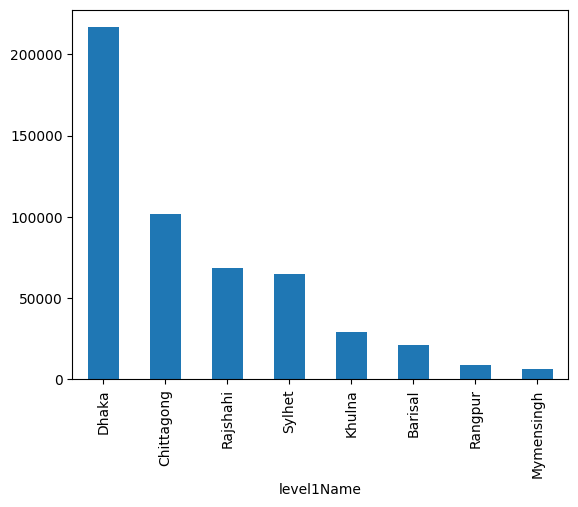

In [21]:
filtered_gbifbd \
    .groupBy(filtered_gbifbd.level1Name) \
    .count() \
    .orderBy("count", ascending=False) \
    .toPandas() \
    .plot(kind = 'bar', x = 'level1Name', y='count', legend=False)

### পাই স্পার্ক এ বিগ ডেটা কোয়েরি এবং এনালাইসিস

#### পাই স্পার্ক এসকিউএল ব্যবহার করে কোয়েরি করার জন্য প্রথমে আমাদের স্পার্ক ডেটাফ্রেম হতে একটি Temporary View বা অস্থায়ী টেবিল তৈরি করে নিতে হবে। আমাদের স্পার্ক সেশন যতক্ষণ চালু থাকবে ততক্ষন এই অস্থায়ী টেবিল উপস্থিত থাকবে।

In [33]:
filtered_gbifbd.createOrReplaceTempView("bdgbif")

#### আমরা আমাদের বায়োডাইভারসিটি ডেটা হতে ৫ টি কলাম এর প্রথম ১০ টি অব্জারভেশন SQL Query চালিয়ে প্রদর্শন করবো

In [36]:
spark.sql("select gbifID, level2Name, genericName, scientificName, eventDate from bdgbif").show(10)

+------------+-----------+-------------------+--------------------+-------------------+
|      gbifID| level2Name|        genericName|      scientificName|          eventDate|
+------------+-----------+-------------------+--------------------+-------------------+
|6.24256711E8|  Netrakona|Lepidocephalichthys|Lepidocephalichth...|2007-12-13T00:00:00|
|6.24256347E8|Cox'S Bazar|      Parapocryptes|Parapocryptes bat...|2007-12-09T00:00:00|
| 6.2425636E8|     Sylhet|            Devario|Devario devario (...|2007-12-05T00:00:00|
|6.24260659E8|      Dhaka|  Paracanthocobitis|Paracanthocobitis...|2007-12-03T00:00:00|
|6.24260672E8|     Sylhet|             Colisa|Colisa fasciata (...|2007-12-05T00:00:00|
|6.24256294E8| Chittagong|        Aplocheilus|Aplocheilus panch...|2007-12-10T00:00:00|
|6.24260675E8|     Sylhet|         Osteobrama|Osteobrama cotio ...|2007-12-05T00:00:00|
|6.24256383E8|  Netrakona|        Gymnostomus|Gymnostomus ariza...|2007-12-13T00:00:00|
|6.24260673E8|     Sylhet|      

#### উপরের একই কোয়েরি পাই স্পার্ক ডেটাফ্রেম এপিআই ব্যবহার করে সম্পন্ন করার কোড দেখা যাকঃ

In [37]:
filtered_gbifbd.select('gbifID', 'level2Name', 'genericName', 'scientificName', 'eventDate') \
                .show(10)

+------------+-----------+-------------------+--------------------+-------------------+
|      gbifID| level2Name|        genericName|      scientificName|          eventDate|
+------------+-----------+-------------------+--------------------+-------------------+
|6.24256711E8|  Netrakona|Lepidocephalichthys|Lepidocephalichth...|2007-12-13T00:00:00|
|6.24256347E8|Cox'S Bazar|      Parapocryptes|Parapocryptes bat...|2007-12-09T00:00:00|
| 6.2425636E8|     Sylhet|            Devario|Devario devario (...|2007-12-05T00:00:00|
|6.24260659E8|      Dhaka|  Paracanthocobitis|Paracanthocobitis...|2007-12-03T00:00:00|
|6.24260672E8|     Sylhet|             Colisa|Colisa fasciata (...|2007-12-05T00:00:00|
|6.24256294E8| Chittagong|        Aplocheilus|Aplocheilus panch...|2007-12-10T00:00:00|
|6.24260675E8|     Sylhet|         Osteobrama|Osteobrama cotio ...|2007-12-05T00:00:00|
|6.24256383E8|  Netrakona|        Gymnostomus|Gymnostomus ariza...|2007-12-13T00:00:00|
|6.24260673E8|     Sylhet|      

#### SQL Query চালিয়ে ফিল্টার করে ডেটা প্রদর্শনের একটি উদাহরনঃ আমরা আগের মত একই ৫ টি কলাম সেলেক্ট করবো, এরপর genericName কলামে শুধুমাত্র Devario প্রজাতি ফিল্টার করবো, এবং ফলাফল কে জেলার নাম অর্থাৎ level2Name এর ডেটা অনুযায়ী সর্ট করবো

In [41]:
spark.sql(""" SELECT gbifID, level2Name, genericName, scientificName, eventDate from bdgbif 
          WHERE genericName == 'Devario' order by level2Name """) \
          .show(10)

+-------------+-----------+-----------+--------------------+-------------------+
|       gbifID| level2Name|genericName|      scientificName|          eventDate|
+-------------+-----------+-----------+--------------------+-------------------+
|3.348486901E9|  Bandarban|    Devario|Devario Heckel, 1843|2015-05-14T00:00:00|
|3.348469303E9|  Bandarban|    Devario|Devario Heckel, 1843|2015-05-14T00:00:00|
| 4.73272932E8|  Bandarban|    Devario|Devario coxi Kull...|1996-06-04T00:00:00|
|3.351374933E9| Chittagong|    Devario|Devario aequipinn...|2014-06-01T00:00:00|
|3.348501154E9| Chittagong|    Devario|Devario aequipinn...|2014-11-29T00:00:00|
| 3.34860494E9| Chittagong|    Devario|Devario aequipinn...|2014-06-01T00:00:00|
| 6.24257978E8|Cox'S Bazar|    Devario|Devario anomalus ...|2007-12-09T00:00:00|
|3.348426999E9|Cox'S Bazar|    Devario|Devario anomalus ...|2015-05-08T00:00:00|
| 6.24257979E8|Cox'S Bazar|    Devario|Devario anomalus ...|2007-12-09T00:00:00|
| 6.24256285E8|Cox'S Bazar| 

#### স্পার্ক ডেটাফ্রেম এপিআই ব্যবহার করে আগে প্রদর্শিত একই ফিল্টার কোয়েরি চালানোর কোডঃ

In [42]:
filtered_gbifbd.select('gbifID', 'level2Name', 'genericName', 'scientificName', 'eventDate') \
                .where("genericName == 'Devario'") \
                .orderBy('level2Name') \
                .show(10)

+-------------+-----------+-----------+--------------------+-------------------+
|       gbifID| level2Name|genericName|      scientificName|          eventDate|
+-------------+-----------+-----------+--------------------+-------------------+
|3.348486901E9|  Bandarban|    Devario|Devario Heckel, 1843|2015-05-14T00:00:00|
|3.348469303E9|  Bandarban|    Devario|Devario Heckel, 1843|2015-05-14T00:00:00|
| 4.73272932E8|  Bandarban|    Devario|Devario coxi Kull...|1996-06-04T00:00:00|
|3.351374933E9| Chittagong|    Devario|Devario aequipinn...|2014-06-01T00:00:00|
|3.348501154E9| Chittagong|    Devario|Devario aequipinn...|2014-11-29T00:00:00|
| 3.34860494E9| Chittagong|    Devario|Devario aequipinn...|2014-06-01T00:00:00|
| 6.24257978E8|Cox'S Bazar|    Devario|Devario anomalus ...|2007-12-09T00:00:00|
|3.348426999E9|Cox'S Bazar|    Devario|Devario anomalus ...|2015-05-08T00:00:00|
| 6.24257979E8|Cox'S Bazar|    Devario|Devario anomalus ...|2007-12-09T00:00:00|
| 6.24256285E8|Cox'S Bazar| 

### Join অপারেশন এর মাধ্যমে একাধিক পাই স্পার্ক ডেটাফ্রেম সংযোজন করা

#### ব্যবহারিক এর উদ্দেশ্যে আমরা আমাদের ডেটা কে একাধিক অংশে বিভক্ত করবো। প্রতিটি অংশে মূল ডেটার ভিন্ন ভিন্ন কলাম থাকবে। এছাড়াও প্রতিটি সাবসেট ডেটাতে ডেটা জয়েন এর কি (Key) হিসেবে gbifID কলামটি থাকবে। এই gbifID কলাম টি প্রতিটি অব্জারভেশন এর জন্য ইউনিক বা অনন্য। 

#### পরবর্তীতে আমরা এই gbifID কে জয়েন এর Key হিসেবে ব্যবহার করবো।

In [44]:
gbifbd1 = filtered_gbifbd.select('gbifID','level1Name','locality')
gbifbd2 = filtered_gbifbd.select('gbifID','genericName','scientificName')
gbifbd3 = filtered_gbifbd.select('gbifID','decimalLatitude','decimalLongitude')

#### gbifbd1 ডেটাসেটটিতে জীববৈচিত্র্য সংঘটনের এলাকা সংক্রান্ত তথ্য রয়েছে এবং কি (Key) হিসেবে gbifID কলাম রাখা হয়েছে

In [48]:
gbifbd1.show(5)

+------------+----------+--------------------+
|      gbifID|level1Name|            locality|
+------------+----------+--------------------+
|6.24256711E8|Mymensingh|        Konkai River|
|6.24256347E8|Chittagong|Creek along highw...|
| 6.2425636E8|    Sylhet|Second site near ...|
|6.24260659E8|     Dhaka|Dhaleswari River,...|
|6.24260672E8|    Sylhet|Fish market in Sy...|
+------------+----------+--------------------+
only showing top 5 rows



#### gbifbd2 ডেটাসেটটিতে জীববৈচিত্র্যের নাম সংক্রান্ত তথ্য রয়েছে এবং কি (Key) হিসেবে gbifID কলাম রাখা হয়েছে

In [49]:
gbifbd2.show(5)

+------------+-------------------+--------------------+
|      gbifID|        genericName|      scientificName|
+------------+-------------------+--------------------+
|6.24256711E8|Lepidocephalichthys|Lepidocephalichth...|
|6.24256347E8|      Parapocryptes|Parapocryptes bat...|
| 6.2425636E8|            Devario|Devario devario (...|
|6.24260659E8|  Paracanthocobitis|Paracanthocobitis...|
|6.24260672E8|             Colisa|Colisa fasciata (...|
+------------+-------------------+--------------------+
only showing top 5 rows



#### gbifbd3 ডেটাসেটটিতে জীববৈচিত্র্য সংঘটনের জিও-লোকেশন সংক্রান্ত তথ্য রয়েছে এবং কি (Key) হিসেবে gbifID কলাম রাখা হয়েছে

In [50]:
gbifbd3.show(5)

+------------+---------------+----------------+
|      gbifID|decimalLatitude|decimalLongitude|
+------------+---------------+----------------+
|6.24256711E8|      25.010861|       90.647611|
|6.24256347E8|      21.433333|       91.983333|
| 6.2425636E8|      24.883333|       91.866667|
|6.24260659E8|      23.799417|       90.245944|
|6.24260672E8|      24.883333|       91.866667|
+------------+---------------+----------------+
only showing top 5 rows



#### লেফট জয়েন

In [55]:
gbifbd1.alias("a").join(gbifbd2.alias("b"), gbifbd1['gbifID'] == gbifbd2['gbifID'],"left") \
    .select("a.gbifID", "a.level1Name", "b.genericName") \
        .show(10)

+------------+----------+-------------------+
|      gbifID|level1Name|        genericName|
+------------+----------+-------------------+
|6.24256711E8|Mymensingh|Lepidocephalichthys|
|6.24256347E8|Chittagong|      Parapocryptes|
| 6.2425636E8|    Sylhet|            Devario|
|6.24260659E8|     Dhaka|  Paracanthocobitis|
|6.24260672E8|    Sylhet|             Colisa|
|6.24256294E8|Chittagong|        Aplocheilus|
|6.24260675E8|    Sylhet|         Osteobrama|
|6.24256383E8|Mymensingh|        Gymnostomus|
|6.24260673E8|    Sylhet|            Leiodon|
|6.24256391E8|Mymensingh|      Mastacembelus|
+------------+----------+-------------------+
only showing top 10 rows



#### রাইট জয়েন

In [56]:
gbifbd2.alias("a").join(gbifbd3.alias("b"), gbifbd2['gbifID'] == gbifbd3['gbifID'],"right") \
    .select("a.gbifID", "a.genericName", "b.decimalLatitude", "b.decimalLongitude") \
        .show(10)

+------------+-------------------+---------------+----------------+
|      gbifID|        genericName|decimalLatitude|decimalLongitude|
+------------+-------------------+---------------+----------------+
|6.24256711E8|Lepidocephalichthys|      25.010861|       90.647611|
|6.24256347E8|      Parapocryptes|      21.433333|       91.983333|
| 6.2425636E8|            Devario|      24.883333|       91.866667|
|6.24260659E8|  Paracanthocobitis|      23.799417|       90.245944|
|6.24260672E8|             Colisa|      24.883333|       91.866667|
|6.24256294E8|        Aplocheilus|      22.473833|       91.783139|
|6.24260675E8|         Osteobrama|      24.883333|       91.866667|
|6.24256383E8|        Gymnostomus|      25.103972|          90.659|
|6.24260673E8|            Leiodon|      24.883333|       91.866667|
|6.24256391E8|      Mastacembelus|      25.010861|       90.647611|
+------------+-------------------+---------------+----------------+
only showing top 10 rows



#### ইনার জয়েন

In [57]:
gbifbd1.alias("a").join(gbifbd3.alias("b"), gbifbd1['gbifID'] == gbifbd3['gbifID'],"inner") \
    .select("a.gbifID", "a.locality", "b.decimalLatitude", "b.decimalLongitude") \
        .show(10)

+------------+--------------------+---------------+----------------+
|      gbifID|            locality|decimalLatitude|decimalLongitude|
+------------+--------------------+---------------+----------------+
|6.24256711E8|        Konkai River|      25.010861|       90.647611|
|6.24256347E8|Creek along highw...|      21.433333|       91.983333|
| 6.2425636E8|Second site near ...|      24.883333|       91.866667|
|6.24260659E8|Dhaleswari River,...|      23.799417|       90.245944|
|6.24260672E8|Fish market in Sy...|      24.883333|       91.866667|
|6.24256294E8|Creek at Chittago...|      22.473833|       91.783139|
|6.24260675E8|Fish market in Sy...|      24.883333|       91.866667|
|6.24256383E8|Someswari River n...|      25.103972|          90.659|
|6.24260673E8|Fish market in Sy...|      24.883333|       91.866667|
|6.24256391E8|        Konkai River|      25.010861|       90.647611|
+------------+--------------------+---------------+----------------+
only showing top 10 rows



### বিগ ডেটা ভিজুয়ালাইজেশন এর উদাহরণ

#### Pandas এবং Plotly Express মডিউল ইমপোর্ট করে নিতে হবে

In [61]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

#### বায়োডাইভারসিটি ডেটা থেকে ৫ টি সাইন্টিফিক নেইম ফিল্টার করে বাংলাদেশের ম্যাপ এ জিওগ্রাফিক স্ক্যাটার প্লট আকারে দেখানো হবে

In [64]:
names = ["Oryza sativa L.","Pycnonotus cafer (Linnaeus, 1766)","Corvus splendens Vieillot, 1817","Acridotheres tristis (Linnaeus, 1766)","Passer domesticus (Linnaeus, 1758)"]
pandas_gbifbd = filtered_gbifbd.toPandas()[filtered_gbifbd.toPandas()['scientificName'].isin(names)]

In [65]:
pandas_gbifbd.head(5)

gbifID  level0Name level1Name level2Name               level3Name  \
223  4.153365e+09  Bangladesh     Sylhet   Habiganj              Chunarughat   
228  2.856545e+09  Bangladesh      Dhaka      Dhaka                 Shahbagh   
262  2.850827e+09  Bangladesh      Dhaka      Dhaka                   Adabor   
303  3.651999e+09  Bangladesh      Dhaka    Gazipur                  Sreepur   
311  4.331743e+09  Bangladesh    Barisal    Barisal  Barisal Sadar (Kotwali)   

                                              locality      basisOfRecord  \
223                                                     HUMAN_OBSERVATION   
228                                                     HUMAN_OBSERVATION   
262                                                     HUMAN_OBSERVATION   
303  Mymensingh Division, Gazipur BD-Dhaka (24.2153...  HUMAN_OBSERVATION   
311  BM College Road, Barisal, Barisal Division, BD...  HUMAN_OBSERVATION   

      genericName   kingdom          order  ...         genus  \
223  Acridotheres  Animalia  Passeriformes  ...  Acridotheres   
228        Corvus  Animalia  Passeriformes  ...        Corvus   
262        Passer  Animalia  Passeriformes  ...        Passer   
303    Pycnonotus  Animalia  Passeriformes  ...    Pycnonotus   
311        Corvus  Animalia  Passeriformes  ...        Corvus   

                  species                         scientificName  \
223  Acridotheres tristis  Acridotheres tristis (Linnaeus, 1766)   
228      Corvus splendens        Corvus splendens Vieillot, 1817   
262     Passer domesticus     Passer domesticus (Linnaeus, 1758)   
303      Pycnonotus cafer      Pycnonotus cafer (Linnaeus, 1766)   
311      Corvus splendens        Corvus splendens Vieillot, 1817   

                    acceptedScientificName decimalLatitude  decimalLongitude  \
223  Acridotheres tristis (Linnaeus, 1766)       24.125345         91.445214   
228        Corvus splendens Vieillot, 1817       23.737588         90.401290   
262     Passer domesticus (Linnaeus, 1758)       23.766165         90.349629   
303      Pycnonotus cafer (Linnaeus, 1766)       24.215302         90.373120   
311        Corvus splendens Vieillot, 1817       22.713364         90.356650   

               eventDate                lastParsed               lastCrawled  \
223  2023-04-15T15:57:00  2023-09-28T14:06:16.986Z  2023-09-28T05:00:54.279Z   
228  2017-04-25T16:14:00  2023-09-28T13:01:04.581Z  2023-09-28T05:00:54.279Z   
262  2020-04-23T18:04:45  2023-09-28T11:29:15.766Z  2023-09-28T05:00:54.279Z   
303  2021-07-08T00:00:00  2023-08-25T15:48:11.065Z  2023-08-20T21:18:26.470Z   
311  2022-08-21T00:00:00  2023-08-25T15:54:38.484Z  2023-08-20T21:18:26.470Z   

                      publisher  
223             iNaturalist.org  
228             iNaturalist.org  
262             iNaturalist.org  
303  Cornell Lab of Ornithology  
311  Cornell Lab of Ornithology  

[5 rows x 21 columns]

#### জিওগ্রাফিক স্ক্যাটার প্লট এর কোড

In [66]:
fig = px.scatter_geo(pandas_gbifbd, lat='decimalLatitude', lon='decimalLongitude',color='scientificName',hover_name='locality',title="Bangladesh Biodiversity Occurance Geographic Scatter Plot")

In [67]:
fig.update_geos(fitbounds="locations")
fig.show()

### সমাপ্ত